# Additional analysis on encoding models for DMR stimulus

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import time

from uoineuro.utils import tighten_scatter_plot

%matplotlib inline

In [2]:
results_path = os.path.join(os.environ['HOME'], 'fits/uoineuro/tuning/dmr/dmr_strf_ecog.h5')
results = h5py.File(results_path, 'r')

## Ridge

In [4]:
ridge = results['ridge']
strfs = ridge['strf'][:]
r2s_train = ridge['r2s_train'][:]
r2s_test = ridge['r2s_test'][:]

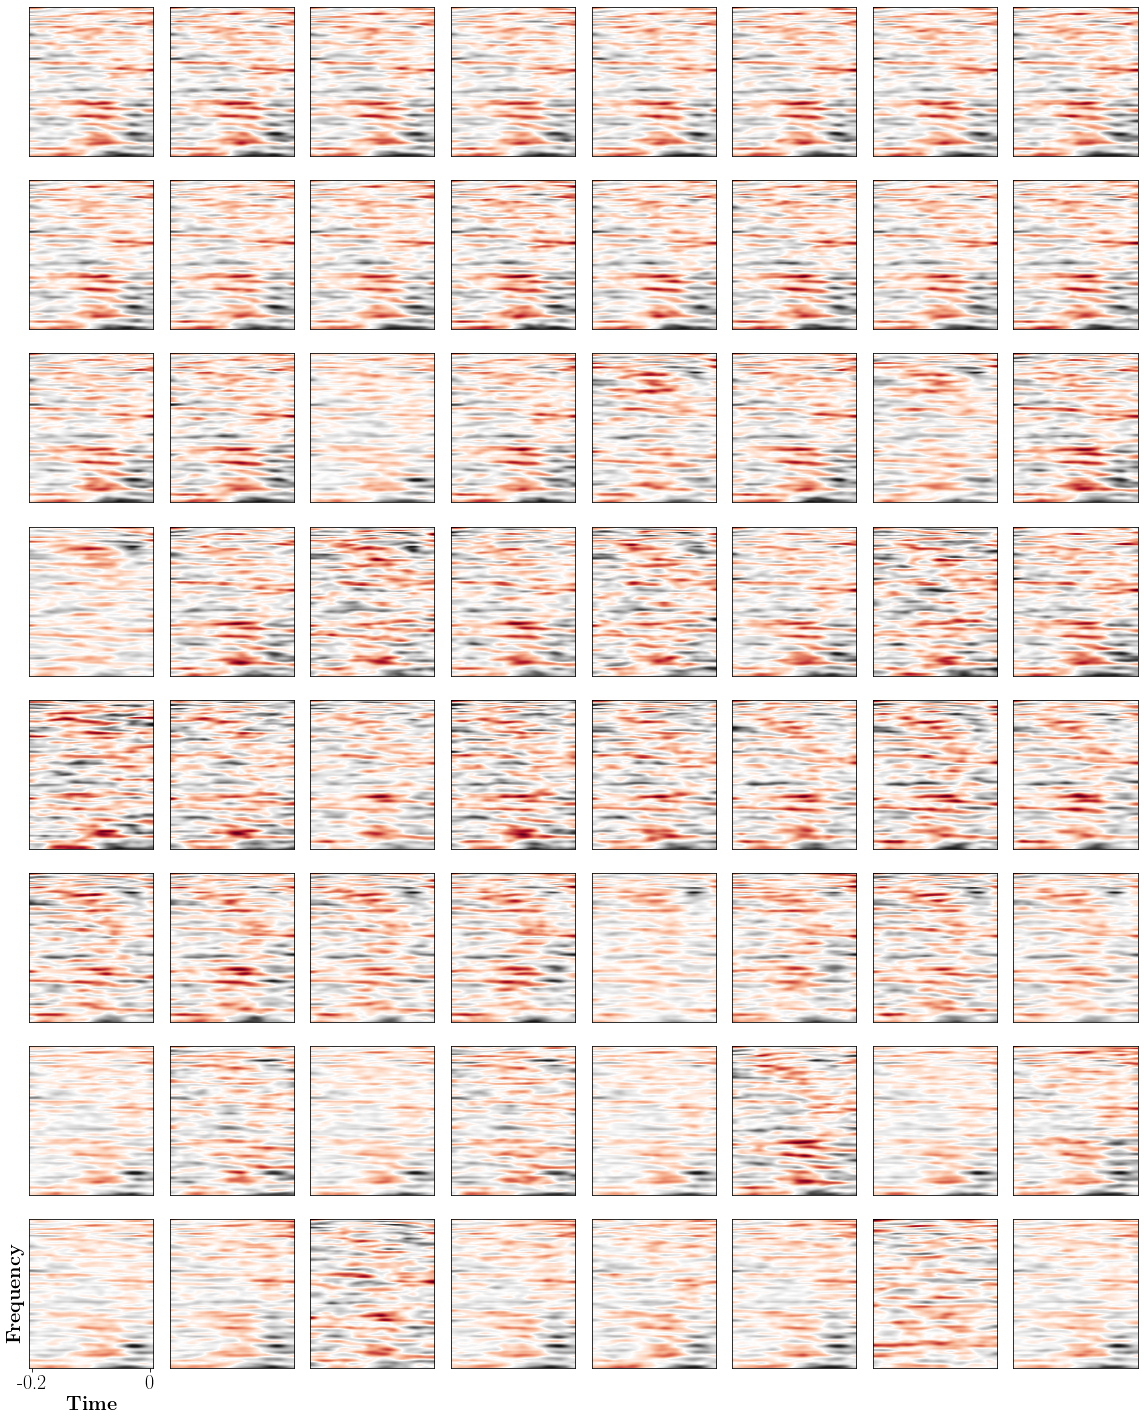

In [5]:
fig, axes = plt.subplots(8, 8, figsize=(16, 20))

for idx, ax in enumerate(axes.ravel()):
    bound = np.max([np.abs(np.max(strfs[idx])), np.abs(np.min(strfs[idx]))])
    ax.imshow(np.flip(strfs[idx].T, axis=(0, 1)),
              cmap='RdGy',
              interpolation='spline36',
              vmin=-bound,
              vmax=bound)
    ax.set_aspect(0.25)
    ax.set_xticks([])
    ax.set_yticks([])
    
axes[-1, 0].set_ylabel(r'\textbf{Frequency}', fontsize=20)
axes[-1, 0].set_xlabel(r'\textbf{Time}', fontsize=20)
axes[-1, 0].tick_params(labelsize=20)
axes[-1, 0].set_xticks([0, 19])
axes[-1, 0].set_xticklabels([-0.2, 0])

plt.tight_layout()
plt.savefig('ridge_dmr_strfs.pdf', bbox_inches='tight')

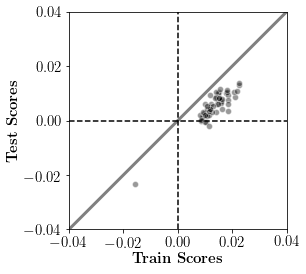

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(r2s_train, r2s_test,
           color='black',
           edgecolor='white',
           alpha=0.40)
ax.axhline(0, linestyle='--', color='k')
ax.axvline(0, linestyle='--', color='k')
ax.set_xticks([-0.04, -0.02, 0., 0.02, 0.04])
tighten_scatter_plot(ax, bounds=[-0.04, 0.04],
                     line_kwargs={'color': 'gray'})
ax.tick_params(labelsize=15)
ax.set_xlabel(r'\textbf{Train Scores}', fontsize=15)
ax.set_ylabel(r'\textbf{Test Scores}', fontsize=15)
plt.savefig('ridge_strf_scores.pdf', bbox_inches='tight')

## Elastic Net

In [8]:
enet = results['elasticnet']
strfs = enet['strf'][:]
r2s_train = enet['r2s_train'][:]
r2s_test = enet['r2s_test'][:]

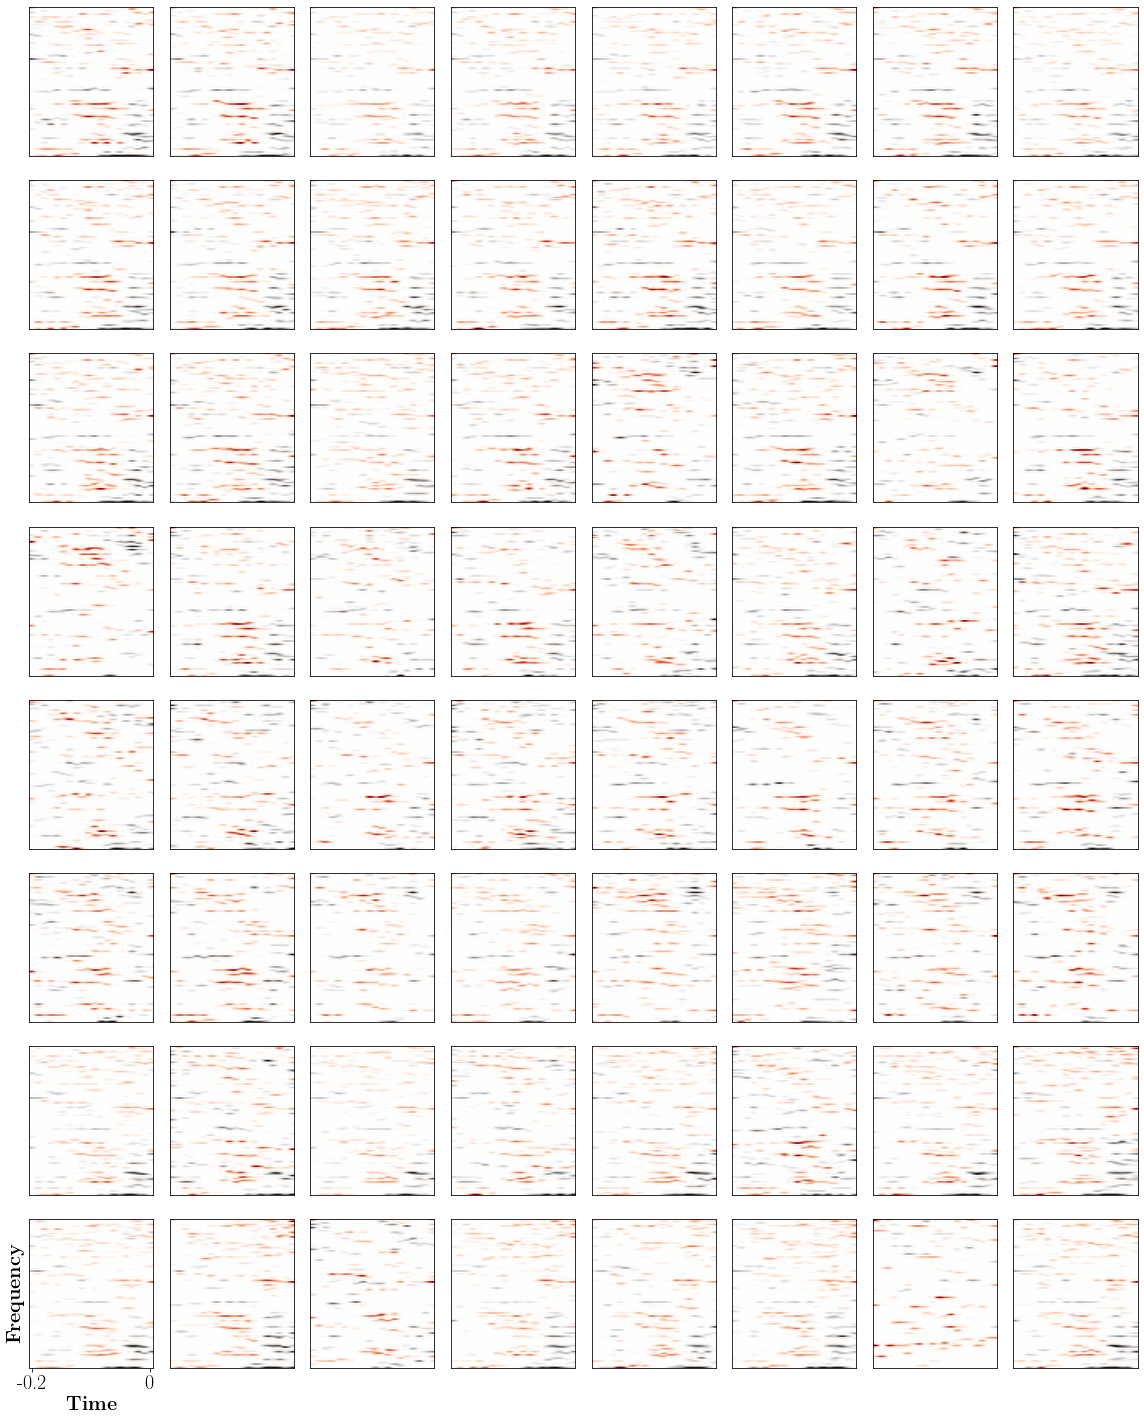

In [9]:
fig, axes = plt.subplots(8, 8, figsize=(16, 20))

for idx, ax in enumerate(axes.ravel()):
    bound = np.max([np.abs(np.max(strfs[idx])), np.abs(np.min(strfs[idx]))])
    ax.imshow(np.flip(strfs[idx].T, axis=(0, 1)),
              cmap='RdGy',
              interpolation='spline36',
              vmin=-bound,
              vmax=bound)
    ax.set_aspect(0.25)
    ax.set_xticks([])
    ax.set_yticks([])
    
axes[-1, 0].set_ylabel(r'\textbf{Frequency}', fontsize=20)
axes[-1, 0].set_xlabel(r'\textbf{Time}', fontsize=20)
axes[-1, 0].tick_params(labelsize=20)
axes[-1, 0].set_xticks([0, 19])
axes[-1, 0].set_xticklabels([-0.2, 0])

plt.tight_layout()
plt.savefig('enet_dmr_strfs.pdf', bbox_inches='tight')

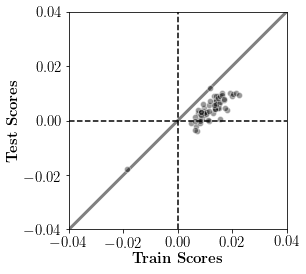

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(r2s_train, r2s_test,
           color='black',
           edgecolor='white',
           alpha=0.40)

ax.axhline(0, linestyle='--', color='k')
ax.axvline(0, linestyle='--', color='k')
ax.set_xticks([-0.04, -0.02, 0., 0.02, 0.04])
tighten_scatter_plot(ax, bounds=[-0.04, 0.04],
                     line_kwargs={'color': 'gray'})
ax.tick_params(labelsize=15)
ax.set_xlabel(r'\textbf{Train Scores}', fontsize=15)
ax.set_ylabel(r'\textbf{Test Scores}', fontsize=15)
plt.savefig('enet_strf_scores.pdf', bbox_inches='tight')

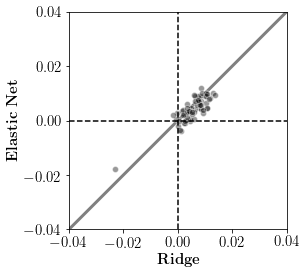

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(ridge['r2s_test'], enet['r2s_test'],
           color='black',
           edgecolor='white',
           alpha=0.40)

ax.axhline(0, linestyle='--', color='k')
ax.axvline(0, linestyle='--', color='k')
ax.set_xticks([-0.04, -0.02, 0., 0.02, 0.04])
tighten_scatter_plot(ax, bounds=[-0.04, 0.04],
                     line_kwargs={'color': 'gray'})
ax.tick_params(labelsize=15)
ax.set_xlabel(r'\textbf{Ridge}', fontsize=15)
ax.set_ylabel(r'\textbf{Elastic Net}', fontsize=15)
plt.savefig('ridge_vs_enet.pdf', bbox_inches='tight')